<h1>Análise Exploratória: Aluguel de Casas no Brasil</h1>

### 1. Importação e Limpeza dos Dados

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# importar o dataset para análise
aluguel = pd.read_csv('houses_to_rent_v2.csv')

In [2]:
# Visualizar as 10 primeiras linhas do dataset
aluguel.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [3]:
# Renomear as colunas
aluguel.columns = ['Cidade', 'Área', 'Quartos', 'Banheiro', 'Estacionamento', 'Andar', 'Animal', 'Mobília', 'HOA',
                   'Valor Aluguel', 'Contribuição Predial', 'Seguro Incêndio', 'Valor Total']

aluguel.head(10)

,Cidade,Área,Quartos,Banheiro,Estacionamento,Andar,Animal,Mobília,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [4]:
# Visualizar as últimas 10 linhas do banco de dados
aluguel.tail(10)

,Cidade,Área,Quartos,Banheiro,Estacionamento,Andar,Animal,Mobília,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
10683,São Paulo,280,4,4,2,5,acept,not furnished,4200,4000,1042,51,9293
10684,Rio de Janeiro,98,2,1,0,1,acept,not furnished,560,3900,184,51,4695
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


In [5]:
# Informação sobre o tamanho do dataset
aluguel.shape

(10692, 13)

In [6]:
# Informação sobre o tipo de dados de cada coluna
aluguel.dtypes

Cidade                  object
Área                     int64
Quartos                  int64
Banheiro                 int64
Estacionamento           int64
Andar                   object
Animal                  object
Mobília                 object
HOA                      int64
Valor Aluguel            int64
Contribuição Predial     int64
Seguro Incêndio          int64
Valor Total              int64
dtype: object

In [7]:
# A coluna Andar apresenta em qual andar o imóvel está localizado
# Existem valores com "-". Devido ao fato de não existir mais informações sobre isso e não pretendo
# excluir as (muitas) linhas contendo esses valores, vamos substituí-los por 0.
aluguel.Andar = aluguel.Andar.replace('-', '0')

In [8]:
aluguel.head(10)

,Cidade,Área,Quartos,Banheiro,Estacionamento,Andar,Animal,Mobília,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [9]:
# Vamos alterar o nome de alguns objetos da coluna Animal e Mobília, traduzindo do inglês para o português

aluguel.Animal.unique() # Valores únicos da coluna para posterior alteração

array(['acept', 'not acept'], dtype=object)

In [10]:
aluguel.Animal = aluguel.Animal.replace({'acept': 'aceita', 'not acept': 'não aceita'})

In [11]:
aluguel.Mobília.unique()

array(['furnished', 'not furnished'], dtype=object)

In [12]:
aluguel.Mobília = aluguel.Mobília.replace({'furnished': 'mobiliado', 'not furnished': 'não mobiliado'})

In [13]:
aluguel.head(10)

,Cidade,Área,Quartos,Banheiro,Estacionamento,Andar,Animal,Mobília,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
0,São Paulo,70,2,1,1,7,aceita,mobiliado,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,aceita,não mobiliado,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,aceita,não mobiliado,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,aceita,não mobiliado,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,não aceita,não mobiliado,0,800,25,11,836
5,São Paulo,376,3,3,7,0,aceita,não mobiliado,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,aceita,não mobiliado,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,aceita,não mobiliado,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,aceita,mobiliado,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,aceita,mobiliado,590,2300,35,30,2955


In [14]:
# Verificar se o dataset possui dados faltantes (NA)
aluguel.isna().sum()

Cidade                  0
Área                    0
Quartos                 0
Banheiro                0
Estacionamento          0
Andar                   0
Animal                  0
Mobília                 0
HOA                     0
Valor Aluguel           0
Contribuição Predial    0
Seguro Incêndio         0
Valor Total             0
dtype: int64

### 2. Exploração do dataset

In [15]:
# Quais cidades possuem mais casas disponíveis para locação?

qtde_casas = aluguel.Cidade.value_counts()
qtde_casas

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: Cidade, dtype: int64

Text(0, 0.5, 'Cidades')

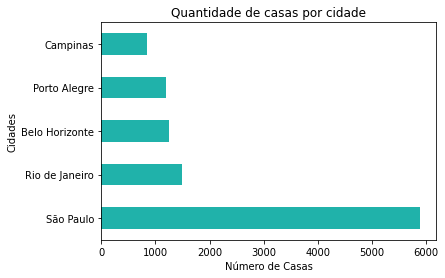

In [16]:
# Visualizar a quantidade de casas por cidade
qtde_casas.plot(kind='barh', color='lightseagreen', )

plt.title('Quantidade de casas por cidade')
plt.xlabel('Número de Casas')
plt.ylabel('Cidades')

In [17]:
# Qual a porcentagem de casas que aceitam animais?

aluguel.Animal.value_counts(normalize=True)*100

aceita        77.777778
não aceita    22.222222
Name: Animal, dtype: float64

In [18]:
# Porcentagem de casas que aceitam animais agrupadas por cidade

cidade_animais = aluguel.groupby('Cidade')['Animal'].value_counts(normalize=True)*100
cidade_animais

Cidade          Animal    
Belo Horizonte  aceita        74.006359
                não aceita    25.993641
Campinas        aceita        81.242673
                não aceita    18.757327
Porto Alegre    aceita        84.241408
                não aceita    15.758592
Rio de Janeiro  aceita        80.279813
                não aceita    19.720187
São Paulo       aceita        76.133854
                não aceita    23.866146
Name: Animal, dtype: float64

In [19]:
# Vamos alterar a estrutura dos dados para posterior visualização
cidade_animais = cidade_animais.unstack(1).round(1)
cidade_animais

Animal,aceita,não aceita
Cidade,,
Belo Horizonte,74.0,26.0
Campinas,81.2,18.8
Porto Alegre,84.2,15.8
Rio de Janeiro,80.3,19.7
São Paulo,76.1,23.9


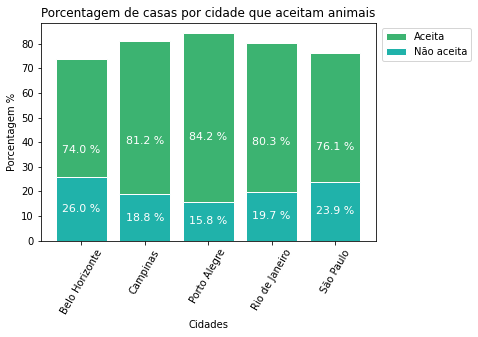

In [20]:
# Visualização da porcentagem de casas que aceitam animais agrupados por cidade

%matplotlib inline

fig, ax = plt.subplots()

width = 0.80

# utilizaremos o gráfico de barras empilhadas
bar1 = ax.bar(cidade_animais.index, cidade_animais['aceita'], width,
              color='mediumseagreen', edgecolor='white', label='Aceita')
bar2 = ax.bar(cidade_animais.index, cidade_animais['não aceita'], width,
              color='lightseagreen', edgecolor='white', label='Não aceita')

# atributos do gráfico
ax.set_ylabel('Porcentagem %')
ax.set_xlabel('Cidades')
ax.set_title('Porcentagem de casas por cidade que aceitam animais')
plt.xticks(rotation=60, horizontalalignment="center")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# adicionando rótulos dos valores nas barras
ax.bar_label(bar1, (str(i) + ' %' for i in cidade_animais['aceita']),
             label_type='center', color='white', fontsize=11)
ax.bar_label(bar2, (str(i) + ' %' for i in cidade_animais['não aceita']),
                    label_type='center', color='white', fontsize=11)

plt.show() 

In [21]:
# Qual a porcentagem de casas que são mobiliadas?

aluguel.Mobília.value_counts(normalize=True)*100

não mobiliado    75.626637
mobiliado        24.373363
Name: Mobília, dtype: float64

In [22]:
# Porcentagem de casas que possuim móveis instalados agrupados por cidade
 
cidade_móveis = aluguel.groupby('Cidade')['Mobília'].value_counts(normalize=True)*100
cidade_móveis = cidade_móveis.unstack(1).round(1)
cidade_móveis

Mobília,mobiliado,não mobiliado
Cidade,,
Belo Horizonte,14.1,85.9
Campinas,13.0,87.0
Porto Alegre,26.7,73.3
Rio de Janeiro,27.0,73.0
São Paulo,27.1,72.9


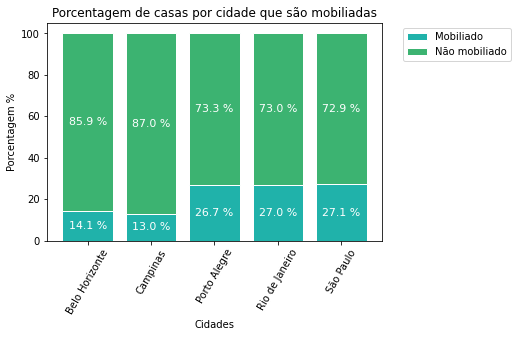

In [23]:
# Visualização da porcentagem de casas que possuem móbilia agrupados por cidade

%matplotlib inline

fig, ax = plt.subplots()

width = 0.80

# utilizaremos o gráfico de barras empilhadas
bar1 = ax.bar(cidade_móveis.index, cidade_móveis['mobiliado'], width,
              color='lightseagreen', edgecolor='white', label='Mobiliado')

bar2 = ax.bar(cidade_móveis.index, cidade_móveis['não mobiliado'], width,
              bottom=cidade_móveis['mobiliado'], color='mediumseagreen',
              edgecolor='white', label='Não mobiliado')

# atributos do gráfico
ax.set_ylabel('Porcentagem %')
ax.set_xlabel('Cidades')
ax.set_title('Porcentagem de casas por cidade que são mobiliadas')
plt.xticks(rotation=60, horizontalalignment="center")
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# adicionando rótulos dos valores nas barras
ax.bar_label(bar1, (str(i) + ' %' for i in cidade_móveis['mobiliado']),
             label_type='center', color='white', fontsize=11)
ax.bar_label(bar2, (str(i) + ' %' for i in cidade_móveis['não mobiliado']),
                    label_type='center', color='white', fontsize=11)

plt.show() 

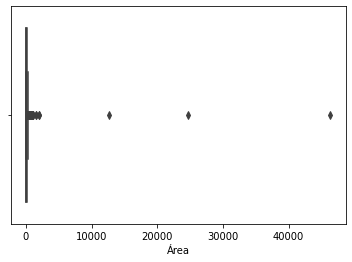

In [24]:
# Remover outliers do dataset através dos valores da coluna 'Área'

ax = sns.boxplot(aluguel['Área'])

In [25]:
# Contagem das áreas que possuem mais de 1000 metros
aluguel[aluguel['Área'] > 1000].count()

Cidade                  9
Área                    9
Quartos                 9
Banheiro                9
Estacionamento          9
Andar                   9
Animal                  9
Mobília                 9
HOA                     9
Valor Aluguel           9
Contribuição Predial    9
Seguro Incêndio         9
Valor Total             9
dtype: int64

In [26]:
# redefinir o dataset, removendo as áreas com mais de 1000 metros quadrados
aluguel = aluguel[aluguel['Área'] <= 1000]
aluguel.head(10)

,Cidade,Área,Quartos,Banheiro,Estacionamento,Andar,Animal,Mobília,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
0,São Paulo,70,2,1,1,7,aceita,mobiliado,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,aceita,não mobiliado,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,aceita,não mobiliado,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,aceita,não mobiliado,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,não aceita,não mobiliado,0,800,25,11,836
5,São Paulo,376,3,3,7,0,aceita,não mobiliado,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,aceita,não mobiliado,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,aceita,não mobiliado,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,aceita,mobiliado,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,aceita,mobiliado,590,2300,35,30,2955


In [27]:
# verificar se as áreas com mais de 1000 metros foram removidas
aluguel[aluguel['Área'] >= 1000]

,Cidade,Área,Quartos,Banheiro,Estacionamento,Andar,Animal,Mobília,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
640,Belo Horizonte,1000,5,7,8,0,aceita,não mobiliado,0,14980,1904,246,17130
1250,São Paulo,1000,4,7,4,10,aceita,mobiliado,6000,15000,4900,191,26090
3052,Belo Horizonte,1000,3,4,2,0,aceita,não mobiliado,0,5000,365,82,5447
6615,Belo Horizonte,1000,5,4,3,15,aceita,não mobiliado,1255,7000,634,94,8983
9857,São Paulo,1000,4,2,8,0,aceita,não mobiliado,0,15000,2334,226,17560
10184,São Paulo,1000,4,5,7,5,aceita,não mobiliado,8362,6800,4170,87,19420


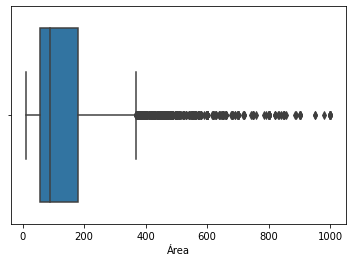

In [28]:
# Verificação de novos outliers. Não iremos retirar ainda mais outliers do dataset.
ax = sns.boxplot(aluguel['Área'])

In [29]:
# Verificar o tamanho atual do dataset com a mudança realizada anteriormente
aluguel.shape

(10683, 13)

In [30]:
# Qual o valor total médio para se alugar uma casa agrupado por cidade?

cidade_aluguel = aluguel[['Cidade', 'Valor Total']]
aluguel_medio_cidade = cidade_aluguel.groupby('Cidade').mean().sort_values('Valor Total', ascending=False).round(2)
aluguel_medio_cidade

,Valor Total
Cidade,
São Paulo,6375.13
Belo Horizonte,6310.66
Rio de Janeiro,4611.68
Campinas,3174.16
Porto Alegre,2989.78


Text(0.5, 1.0, 'Valor Total Médio de se alugar uma casa por cidade')

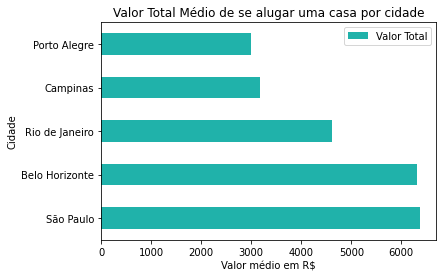

In [31]:
# Visualização do valor total médio de se alugar uma casa agrupado por cidade

aluguel_medio_cidade.plot(kind='barh', color='lightseagreen')

plt.xlabel('Valor médio em R$')
plt.title('Valor Total Médio de se alugar uma casa por cidade')

In [32]:
# Para melhorar a análise do dataset, vamos segmentar as áreas

# Verificar a área máxima e a área mínima da coluna Área
print(f"Área máxima: {aluguel['Área'].max()}")
print(f"Área mínima: {aluguel['Área'].min()}")

Área máxima: 1000
Área mínima: 11


In [33]:
# definição das faixas das áreas
faixas = np.array([0, 100, 200, 300, 400, 500, 600,
                  700, 1000])

# segmentar as áreas do dataset através da função pd.cut
faixas_area = pd.cut(aluguel['Área'], faixas)

In [34]:
faixas_area

0          (0, 100]
1        (300, 400]
2          (0, 100]
3          (0, 100]
4          (0, 100]
            ...    
10687      (0, 100]
10688    (200, 300]
10689      (0, 100]
10690    (100, 200]
10691      (0, 100]
Name: Área, Length: 10683, dtype: category
Categories (8, interval[int64]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] < (400, 500] < (500, 600] < (600, 700] < (700, 1000]]

In [35]:
# Com as faixas das áreas definidas, vamos realizar algumas análises

# Qual a quantidade de casas disponíveis para locação por faixa de área em cada cidade?

cidade_area = aluguel.groupby(['Cidade', faixas_area])
cidade_area.size().unstack(0)

Cidade,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
Área,,,,,
"(0, 100]",605,560,861,1007,2882
"(100, 200]",308,160,201,361,1452
"(200, 300]",159,67,62,76,866
"(300, 400]",96,28,40,26,398
"(400, 500]",41,18,17,18,145
"(500, 600]",19,8,7,6,66
"(600, 700]",10,7,2,5,31
"(700, 1000]",16,4,3,2,43


In [36]:
# Adicionar uma coluna com o quantidade total em cada área

total_area = cidade_area.size().unstack(0)
total_area['Total'] = total_area.sum(1)
total_area

Cidade,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,Total
Área,,,,,,
"(0, 100]",605,560,861,1007,2882,5915
"(100, 200]",308,160,201,361,1452,2482
"(200, 300]",159,67,62,76,866,1230
"(300, 400]",96,28,40,26,398,588
"(400, 500]",41,18,17,18,145,239
"(500, 600]",19,8,7,6,66,106
"(600, 700]",10,7,2,5,31,55
"(700, 1000]",16,4,3,2,43,68


In [37]:
# Distribuição em porcentagem da quantidade de casas por cidade

cidade_area_count = cidade_area.size().unstack(0)

cidade_area_porcentagem = cidade_area_count.div(cidade_area_count.sum(axis=1), axis=(0))

cidade_area_porcentagem

Cidade,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
Área,,,,,
"(0, 100]",0.102282,0.094675,0.145562,0.170245,0.487236
"(100, 200]",0.124093,0.064464,0.080983,0.145447,0.585012
"(200, 300]",0.129268,0.054472,0.050407,0.061789,0.704065
"(300, 400]",0.163265,0.047619,0.068027,0.044218,0.676871
"(400, 500]",0.171548,0.075314,0.071130,0.075314,0.606695
"(500, 600]",0.179245,0.075472,0.066038,0.056604,0.622642
"(600, 700]",0.181818,0.127273,0.036364,0.090909,0.563636
"(700, 1000]",0.235294,0.058824,0.044118,0.029412,0.632353


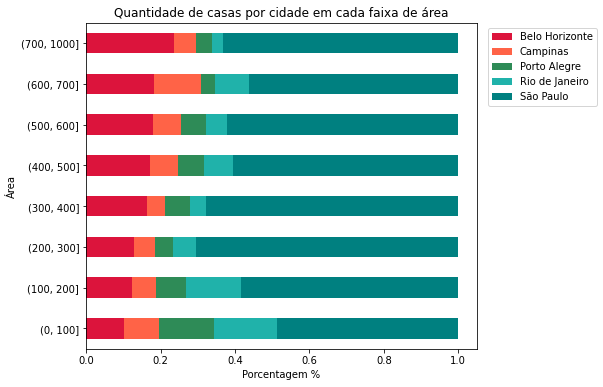

In [38]:
# Visualização dos resultados acima

plt.rcParams["figure.figsize"] = (7, 6)

colors = ('crimson', 'tomato', 'seagreen', 'lightseagreen', 'teal')

cidade_area_porcentagem.plot(kind='barh', stacked=True, color=colors)

plt.xlabel('Porcentagem %')
plt.title('Quantidade de casas por cidade em cada faixa de área')
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))

plt.show()

In [39]:
# Qual a média de quartos, banheiros e vagas de estacionamento por faixa de área agrupado por cidade?

caracteristicas = ['Banheiro', 'Quartos', 'Estacionamento']
caracteristicas_media = cidade_area[caracteristicas].mean().round(0).unstack(0)
caracteristicas_media

Banheiro                                                 \
Cidade      Belo Horizonte Campinas Porto Alegre Rio de Janeiro São Paulo   
Área                                                                        
(0, 100]               1.0      1.0          1.0            1.0       1.0   
(100, 200]             3.0      2.0          2.0            2.0       3.0   
(200, 300]             4.0      4.0          3.0            3.0       4.0   
(300, 400]             4.0      4.0          4.0            3.0       4.0   
(400, 500]             5.0      5.0          4.0            5.0       5.0   
(500, 600]             4.0      5.0          5.0            6.0       5.0   
(600, 700]             5.0      6.0          7.0            5.0       6.0   
(700, 1000]            6.0      6.0          3.0            6.0       6.0   

                   Quartos                                                 \
Cidade      Belo Horizonte Campinas Porto Alegre Rio de Janeiro São Paulo   
Área                                                                        
(0, 100]               2.0      2.0          2.0            2.0       2.0   
(100, 200]             3.0      3.0          3.0            3.0       3.0   
(200, 300]             4.0      4.0          4.0            4.0       4.0   
(300, 400]             4.0      4.0          4.0            4.0       4.0   
(400, 500]             5.0      4.0          4.0            4.0       4.0   
(500, 600]             4.0      4.0          4.0            6.0       4.0   
(600, 700]             6.0      5.0          6.0            5.0       4.0   
(700, 1000]            5.0      4.0          4.0            6.0       4.0   

            Estacionamento                                                 
Cidade      Belo Horizonte Campinas Porto Alegre Rio de Janeiro São Paulo  
Área                                                                       
(0, 100]               1.0      1.0          1.0            0.0       1.0  
(100, 200]             2.0      2.0          1.0            1.0       2.0  
(200, 300]             3.0      3.0          2.0            2.0       3.0  
(300, 400]             4.0      3.0          3.0            2.0       4.0  
(400, 500]             4.0      4.0          4.0            2.0       4.0  
(500, 600]             5.0      6.0          4.0            2.0       5.0  
(600, 700]             6.0      5.0          4.0            3.0       5.0  
(700, 1000]            5.0      6.0          4.0            4.0       6.0

In [40]:
# Vamos melhorar a visualização do dataframe acima

cm1 = sns.light_palette("seagreen", as_cmap=True)
cm2 = sns.light_palette("teal", as_cmap=True)
cm3 = sns.light_palette("tomato", as_cmap=True)

(caracteristicas_media.style
 .background_gradient(cmap=cm1, subset=['Banheiro'])
 .background_gradient(cmap=cm2, subset=['Quartos'])
 .background_gradient(cmap=cm3, subset=['Estacionamento'])
 .highlight_max(color=None)
 .set_properties(**{'text-align': 'right'})
 .set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
 .set_caption("Os maiores valores possuem cores mais intensas e estão relacionados com a cidade (coluna) em cada característica")
 .set_precision(1)
)

In [41]:
# Qual a média de cada valor que engloba o custo total para se alugar uma casa agrupado por cidade e área?

custo_aluguel = ['HOA', 'Valor Aluguel', 'Contribuição Predial', 'Seguro Incêndio']
custo_medio_aluguel = cidade_area[custo_aluguel].mean()
custo_medio_aluguel

HOA  Valor Aluguel  Contribuição Predial  \
Cidade         Área                                                            
Belo Horizonte (0, 100]      329.180165    1539.284298             94.801653   
               (100, 200]   7942.879870    3706.607143            273.922078   
               (200, 300]    953.666667    6268.257862            540.540881   
               (300, 400]    784.052083    7247.750000            521.833333   
               (400, 500]    569.585366    8831.512195            516.243902   
               (500, 600]    715.736842   10073.684211            800.105263   
               (600, 700]      0.000000   10614.100000            874.600000   
               (700, 1000]   654.062500    9970.312500           1161.312500   
Campinas       (0, 100]      477.064286    1363.016071             61.705357   
               (100, 200]    758.412500    2839.525000            177.050000   
               (200, 300]   1117.955224    4613.462687            353.000000   
               (300, 400]   1008.357143    6452.857143            459.714286   
               (400, 500]   1148.222222    7649.166667            590.111111   
               (500, 600]    552.875000    7350.000000            680.500000   
               (600, 700]   2134.428571    8122.857143            759.714286   
               (700, 1000]  1025.000000   13600.000000           1266.500000   
Porto Alegre   (0, 100]      402.941928    1520.149826             59.967480   
               (100, 200]    757.557214    3366.810945            200.293532   
               (200, 300]    514.709677    4547.403226            303.806452   
               (300, 400]    965.925000    7222.975000            504.100000   
               (400, 500]    500.000000    7438.823529            401.470588   
               (500, 600]    792.857143    9171.428571            643.428571   
               (600, 700]      0.000000   12900.000000            325.000000   
               (700, 1000]   900.000000    5326.666667           1696.000000   
Rio de Janeiro (0, 100]      807.870904    2100.497517            150.345581   
               (100, 200]   1440.576177    4531.891967            352.349030   
               (200, 300]   2114.105263    7318.552632            708.250000   
               (300, 400]   2300.230769    9293.538462            781.307692   
               (400, 500]   2146.666667    8633.333333            822.111111   
               (500, 600]   1923.333333    9438.833333           1046.333333   
               (600, 700]   3199.200000   12700.000000           1978.000000   
               (700, 1000]     0.000000   14000.000000            917.000000   
São Paulo      (0, 100]      595.827897    2512.627342            207.638446   
               (100, 200]   1240.306474    5050.561983            390.444215   
               (200, 300]   2122.978060    7228.852194            808.337182   
               (300, 400]   2499.050251    8601.185930           1180.751256   
               (400, 500]   1715.082759   10419.496552           1446.848276   
               (500, 600]   2185.545455   10201.954545           2052.303030   
               (600, 700]   1272.774194   13159.677419           3032.774194   
               (700, 1000]  2249.627907   11721.511628           2952.186047   

                            Seguro Incêndio  
Cidade         Área                          
Belo Horizonte (0, 100]           21.317355  
               (100, 200]         53.087662  
               (200, 300]         91.106918  
               (300, 400]        109.656250  
               (400, 500]        136.902439  
               (500, 600]        156.894737  
               (600, 700]        174.400000  
               (700, 1000]       159.687500  
Campinas       (0, 100]           17.905357  
               (100, 200]         38.556250  
               (200, 300]         63.522388  
               (300, 400]         94.500000  
               (400, 500]      

In [42]:
# Apresentar os resultados da tabela acima em porcentagem
cm_aluguel_porcentagem = custo_medio_aluguel.div(custo_medio_aluguel.sum(1), axis=(0))
cm_aluguel_porcentagem

HOA  Valor Aluguel  Contribuição Predial  \
Cidade         Área                                                         
Belo Horizonte (0, 100]     0.165869       0.775621              0.047769   
               (100, 200]   0.663206       0.309490              0.022872   
               (200, 300]   0.121431       0.798141              0.068827   
               (300, 400]   0.090503       0.836605              0.060235   
               (400, 500]   0.056651       0.878387              0.051346   
               (500, 600]   0.060932       0.857596              0.068115   
               (600, 700]   0.000000       0.910058              0.074989   
               (700, 1000]  0.054754       0.834659              0.097219   
Campinas       (0, 100]     0.248511       0.710018              0.032143   
               (100, 200]   0.198873       0.744590              0.046427   
               (200, 300]   0.181842       0.750408              0.057418   
               (300, 400]   0.125802       0.805055              0.057354   
               (400, 500]   0.120899       0.805402              0.062134   
               (500, 600]   0.063590       0.845374              0.078269   
               (600, 700]   0.191694       0.729517              0.068230   
               (700, 1000]  0.063678       0.844904              0.078682   
Porto Alegre   (0, 100]     0.200881       0.757850              0.029896   
               (100, 200]   0.173110       0.769353              0.045769   
               (200, 300]   0.094578       0.835590              0.055825   
               (300, 400]   0.109594       0.819519              0.057195   
               (400, 500]   0.059083       0.879012              0.047440   
               (500, 600]   0.073664       0.852114              0.059781   
               (600, 700]   0.000000       0.958751              0.024155   
               (700, 1000]  0.112266       0.664449              0.211559   
Rio de Janeiro (0, 100]     0.261776       0.680629              0.048717   
               (100, 200]   0.225658       0.709896              0.055194   
               (200, 300]   0.206481       0.714791              0.069174   
               (300, 400]   0.184063       0.743664              0.062520   
               (400, 500]   0.183161       0.736626              0.070145   
               (500, 600]   0.153408       0.752858              0.083457   
               (600, 700]   0.177119       0.703118              0.109509   
               (700, 1000]  0.000000       0.925283              0.060606   
São Paulo      (0, 100]     0.177929       0.750333              0.062006   
               (100, 200]   0.183803       0.748450              0.057860   
               (200, 300]   0.206972       0.704750              0.078806   
               (300, 400]   0.201530       0.693623              0.095219   
               (400, 500]   0.124915       0.758888              0.105379   
               (500, 600]   0.149844       0.699460              0.140709   
               (600, 700]   0.072082       0.745279              0.171757   
               (700, 1000]  0.131587       0.685625              0.172682   

                            Seguro Incêndio  
Cidade         Área                          
Belo Horizonte (0, 100]            0.010741  
               (100, 200]          0.004433  
               (200, 300]          0.011601  
               (300, 400]          0.012658  
               (400, 500]          0.013616  
               (500, 600]          0.013357  
               (600, 700]          0.014953  
               (700, 1000]         0.013368  
Campinas       (0, 100]            0.009327  
               (100, 200]          0.010110  
               (200, 300]          0.010332  
               (300, 400]          0.011790  
               (400, 500]          0.011565  
               (500, 600]          0.012767  
               (600, 700]          0.010559  
               (

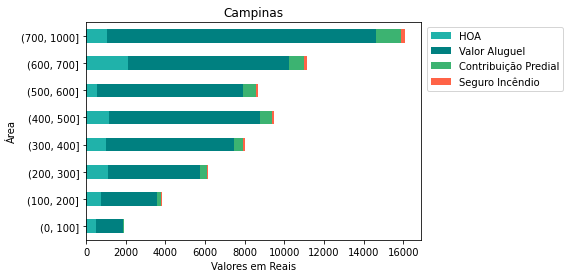

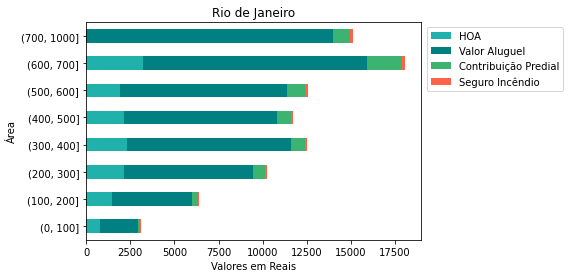

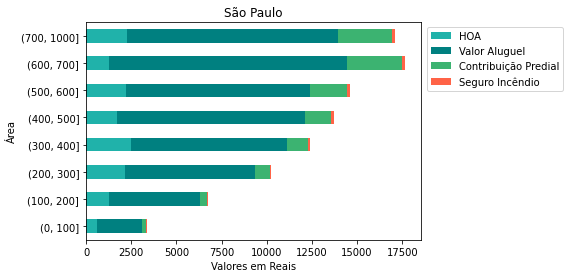

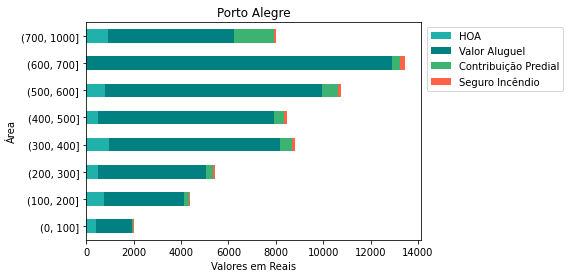

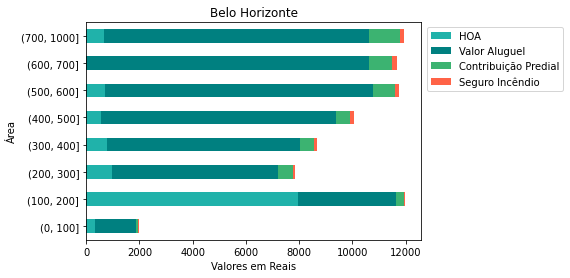

In [43]:
# Visualizar a composição do custo total de se alugar uma casa agrupado por cidade e faixa de área

%matplotlib inline

estados = set(aluguel['Cidade'])

colors = ('lightseagreen', 'teal','mediumseagreen',  'tomato')

for i in estados:
    custo_medio_aluguel.loc[i].plot.barh(stacked=True, color=colors)
    plt.legend(loc='upper right', bbox_to_anchor=(1.44, 1))
    plt.xlabel('Valores em Reais')
    
    plt.title(i)

### 2.1 Análise de relacionamento entre variáveis

In [44]:
# Vamos realizar algumas análises de relacionamento entre variáveis, utilizando a correlação de Pearson

# Correlação entre todas as variáveis
corr_aluguel = aluguel.corr(method='pearson')
corr_aluguel

,Área,Quartos,Banheiro,Estacionamento,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
Área,1.000000,0.709943,0.774817,0.700776,0.028092,0.682354,0.114617,0.717727,0.191256
Quartos,0.709943,1.000000,0.733652,0.617601,0.007171,0.541429,0.074499,0.564773,0.134340
Banheiro,0.774817,0.733652,1.000000,0.697171,0.050363,0.668235,0.108641,0.676101,0.208162
Estacionamento,0.700776,0.617601,0.697171,1.000000,0.009384,0.578314,0.097170,0.597086,0.148422
HOA,0.028092,0.007171,0.050363,0.009384,1.000000,0.036493,0.007624,0.029543,0.955091
Valor Aluguel,0.682354,0.541429,0.668235,0.578314,0.036493,1.000000,0.107389,0.987344,0.264261
Contribuição Predial,0.114617,0.074499,0.108641,0.097170,0.007624,0.107389,1.000000,0.105171,0.218162
Seguro Incêndio,0.717727,0.564773,0.676101,0.597086,0.029543,0.987344,0.105171,1.000000,0.254690
Valor Total,0.191256,0.134340,0.208162,0.148422,0.955091,0.264261,0.218162,0.254690,1.000000


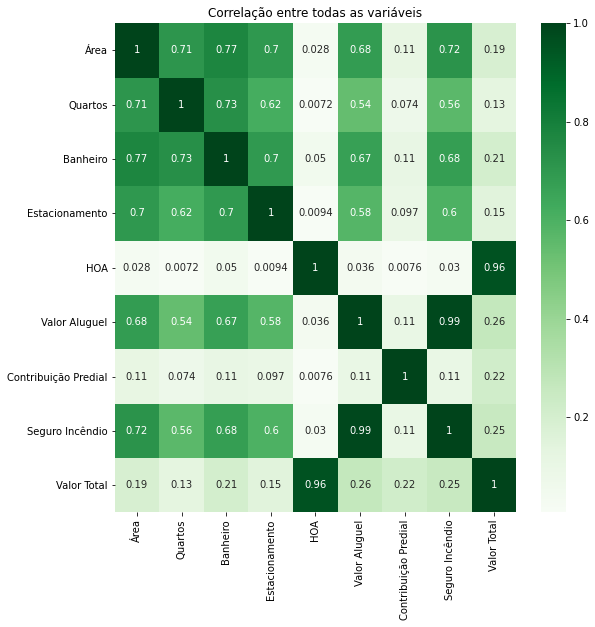

In [45]:
# Mapa de calor da correlação entre todas as variáveis

fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(corr_aluguel,
            annot=True, annot_kws={"size": 10},
            cmap="Greens")

plt.title('Correlação entre todas as variáveis')

plt.show()

In [46]:
# Variáveis com graus de correlação maior que 0.5
corr_aluguel[(corr_aluguel) > 0.5]

,Área,Quartos,Banheiro,Estacionamento,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio,Valor Total
Área,1.000000,0.709943,0.774817,0.700776,NaN,0.682354,NaN,0.717727,NaN
Quartos,0.709943,1.000000,0.733652,0.617601,NaN,0.541429,NaN,0.564773,NaN
Banheiro,0.774817,0.733652,1.000000,0.697171,NaN,0.668235,NaN,0.676101,NaN
Estacionamento,0.700776,0.617601,0.697171,1.000000,NaN,0.578314,NaN,0.597086,NaN
HOA,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.955091
Valor Aluguel,0.682354,0.541429,0.668235,0.578314,NaN,1.000000,NaN,0.987344,NaN
Contribuição Predial,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Seguro Incêndio,0.717727,0.564773,0.676101,0.597086,NaN,0.987344,NaN,1.000000,NaN
Valor Total,NaN,NaN,NaN,NaN,0.955091,NaN,NaN,NaN,1.000000


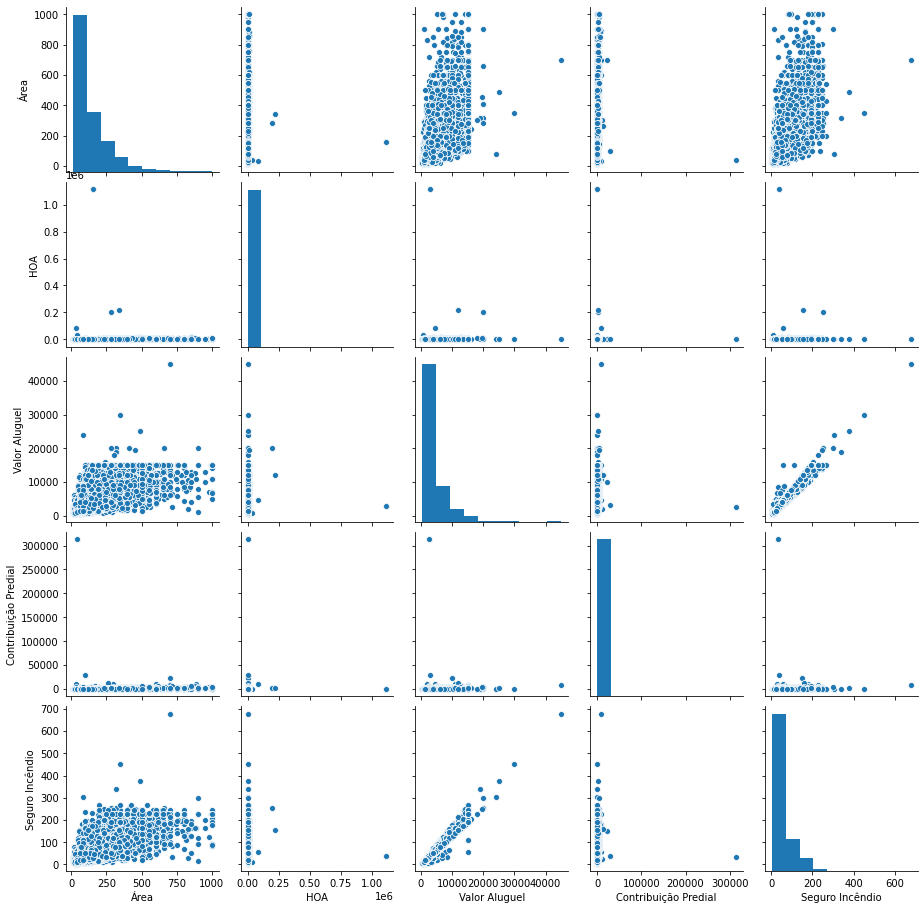

In [47]:
# Correlação entre a área e os valores correspondentes ao custo total de locação

area_valores = aluguel[['Área', 'HOA', 'Valor Aluguel', 'Contribuição Predial', 'Seguro Incêndio']]
sns.pairplot(area_valores)

In [48]:
# importar biblioteca para utilização do coeficiente de Pearson
import scipy
from scipy.stats.stats import pearsonr

#  Coeficiente de Pearson entre Área e Valor Aluguel
pearsonr_coefficient, p_value = pearsonr(aluguel['Área'], aluguel['Valor Aluguel'])
pearsonr_coefficient

0.6823536244329264

In [49]:
# Coeficiente de Pearson entre Área e Valor Total
pearsonr_coefficient, p_value = pearsonr(aluguel['Área'], aluguel['Valor Total'])
pearsonr_coefficient

0.1912563072352555

<AxesSubplot:xlabel='Valor Aluguel', ylabel='Área'>

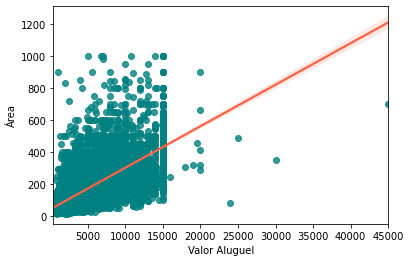

In [57]:
# Visualizar, através do gráfico de regressão, a correlação entre o Valor do Aluguel e a Área
sns.regplot(x='Valor Aluguel', y='Área', data=aluguel,
            scatter_kws={"color": "teal"}, line_kws={"color":"tomato"})

In [51]:
# Correlação entre a área e os valores da composição do custo total em formato de tabela
corr_area_valores = area_valores.corr(method='pearson')
corr_area_valores

,Área,HOA,Valor Aluguel,Contribuição Predial,Seguro Incêndio
Área,1.000000,0.028092,0.682354,0.114617,0.717727
HOA,0.028092,1.000000,0.036493,0.007624,0.029543
Valor Aluguel,0.682354,0.036493,1.000000,0.107389,0.987344
Contribuição Predial,0.114617,0.007624,0.107389,1.000000,0.105171
Seguro Incêndio,0.717727,0.029543,0.987344,0.105171,1.000000


<AxesSubplot:>

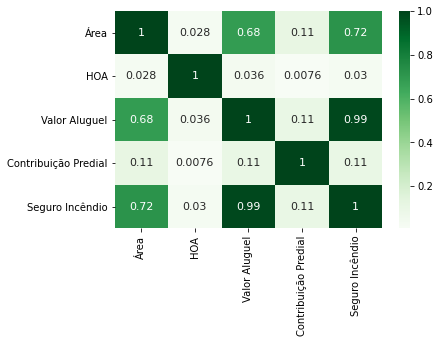

In [52]:
# Matrix de correlação entre a área e os valores da composição do custo total
sns.heatmap(corr_area_valores,
            annot=True, annot_kws={"size": 11},
            cmap="Greens")

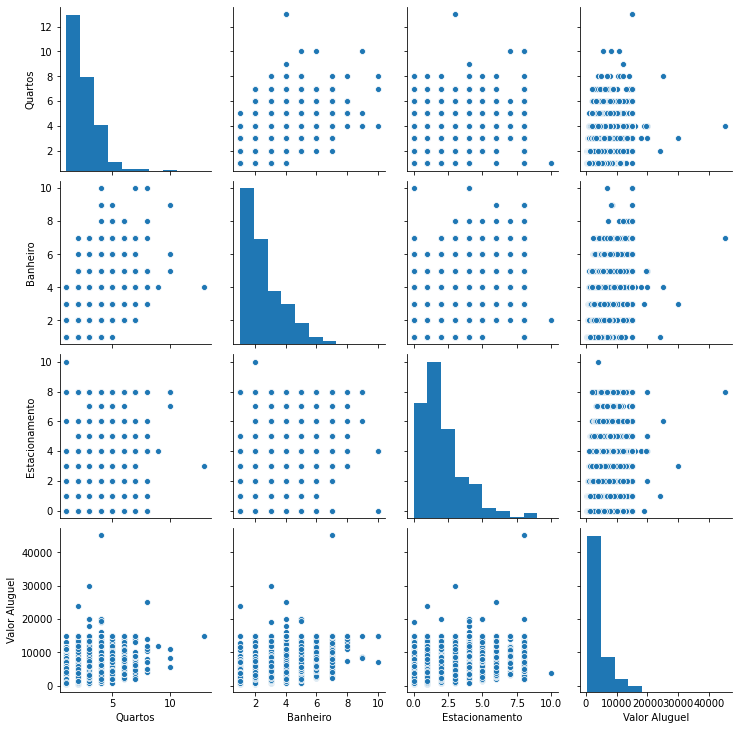

In [53]:
# Correlação entre o valor do aluguel e algumas características das casas

valor_aluguel_caracteristicas = aluguel[['Quartos', 'Banheiro', 'Estacionamento', 'Valor Aluguel']]
sns.pairplot(valor_aluguel_caracteristicas)

In [54]:
corr_aluguel_caracteristica = valor_aluguel_caracteristicas.corr()
corr_aluguel_caracteristica

,Quartos,Banheiro,Estacionamento,Valor Aluguel
Quartos,1.000000,0.733652,0.617601,0.541429
Banheiro,0.733652,1.000000,0.697171,0.668235
Estacionamento,0.617601,0.697171,1.000000,0.578314
Valor Aluguel,0.541429,0.668235,0.578314,1.000000


<AxesSubplot:>

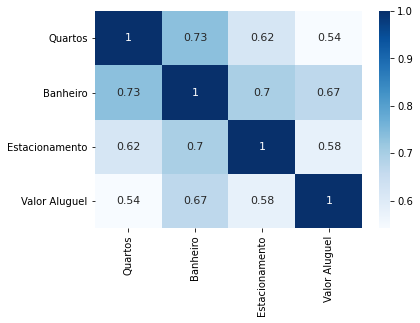

In [55]:
sns.heatmap(corr_aluguel_caracteristica,
           annot=True, annot_kws={"size": 11},
           cmap="Blues")